In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

In [3]:
# reading in data from csv file to dataframe

# data can be found at https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view?usp=sharing

customers = pd.read_csv("/data/Mall_Customers.csv")

In [4]:
# 200 observations, 5 variables
customers.shape

(200, 5)

In [5]:
# list type of each variable
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# display first 10 observations
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# display statistics
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Gender Comparison Among Customers')

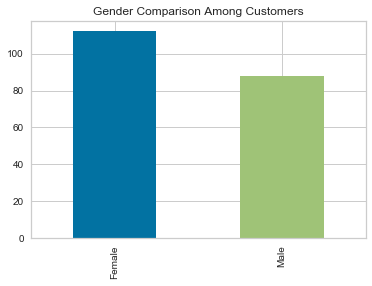

In [8]:
# plot gender comparison using Matplotlib

customers['Gender'].value_counts().plot(kind='bar')

plt.title("Gender Comparison Among Customers")

# More customers are female than male

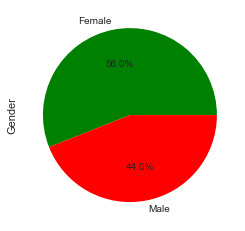

In [9]:
# visualize gender comparison percentage using pie chart 

customers['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])

# 56% of customers are female, while 44% of customers are male

In [10]:

customers.groupby(customers['Gender'])['Spending Score (1-100)'].sum()

Gender
Female    5771
Male      4269
Name: Spending Score (1-100), dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb884d20978>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb884d20e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb884d20518>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb884d2b7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb884d2bb38>],
 'means': []}

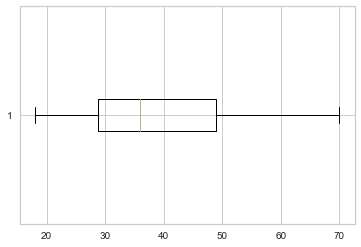

In [11]:
# boxplot tells us minimum age of customers is 18, maximum age is 70, average age is 38

plt.boxplot(x=customers['Age'], vert=False)

Text(0, 0.5, 'Frequency')

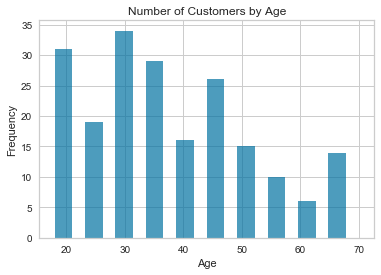

In [12]:
# plot customers by age 

plt.hist(x=customers['Age'], width=3, alpha=0.7)

plt.title('Number of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# higher frequency of customers in their 30s

Text(0, 0.5, 'Frequency')

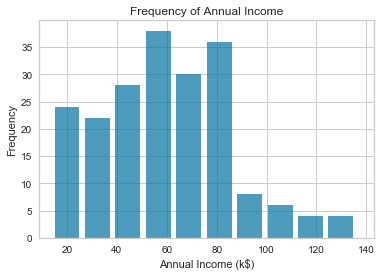

In [13]:
# plot customers by income

plt.hist(x=customers['Annual Income (k$)'], width=10, alpha=0.7)

plt.title('Frequency of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Higher frequency of customers earn 50-60k annually

Text(0.5, 0, 'Annual Income (k$)')

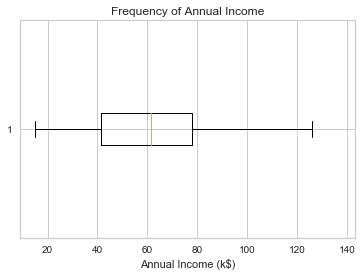

In [14]:
# Plot annual income using box plot to see range 

plt.boxplot(x=customers['Annual Income (k$)'], vert=False)

plt.title('Frequency of Annual Income')
plt.xlabel('Annual Income (k$)')

# Average annual income around $60k, middle 50% of customers earn between 40-80k, outlier at ~140k

Text(0, 0.5, 'Frequency')

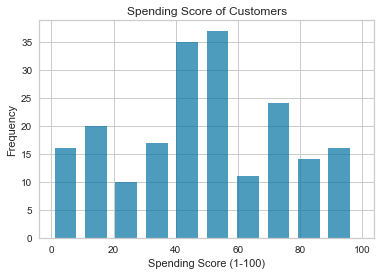

In [15]:
# analyzing spending score of customers using histogram

plt.hist(x=customers['Spending Score (1-100)'], width=7, alpha=0.7)

plt.title('Spending Score of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# The greatest frequency of customers have a score in the 40s and 50s  

Text(0.5, 0, 'Spending Score')

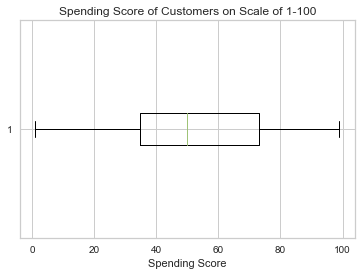

In [16]:
# analyzing spending score of customers using boxplot

plt.boxplot(x=customers['Spending Score (1-100)'], vert=False)

plt.title('Spending Score of Customers on Scale of 1-100')
plt.xlabel('Spending Score')

# Average spending score is 50, middle 50% of customers have score between 35-75

Text(0, 0.5, 'Spending Score (1-100)')

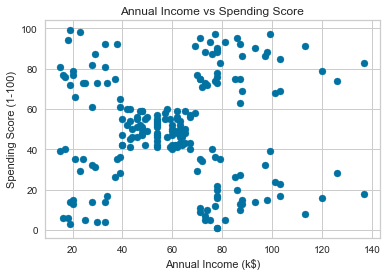

In [17]:
# scatter plot to visualize all data points

X = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [18]:
# K-means clustering, given scatter plot above there appear to be 5 clusters

k = 5

kmeans = KMeans(n_clusters=k, random_state=0).fit(X)


In [19]:
# get and print coordinates of cluster centroids

print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


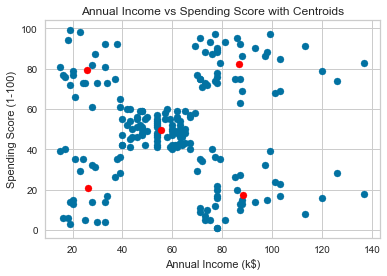

In [20]:
# visualize centroids 

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')


In [21]:
# get mean silhouette score of all data points

print(silhouette_score(X, kmeans.labels_))

# 55% is ok, but not great

0.553931997444648


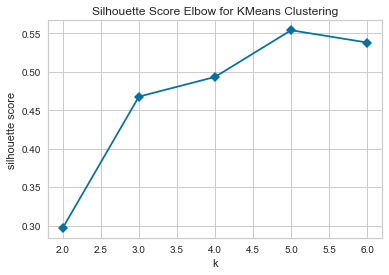

In [22]:
# train multiple models using k = 2,3,4,5,6 to determine which k gives highest silhouette score

KMmodel = KMeans(random_state=0)
visualizer = KElbowVisualizer(KMmodel, k=(2,7), metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(X)  

visualizer.poof()   

The optimal number of clusters when plotting Annual Income vs Spending Score appears to be k=5. 

In [25]:
num_samples_total = 1000
cluster_centers = kmeans.cluster_centers_
num_clusters = k

X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_clusters, center_box=(0, 1), cluster_std = 2)

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [27]:
predictions = kmeans.predict(X)

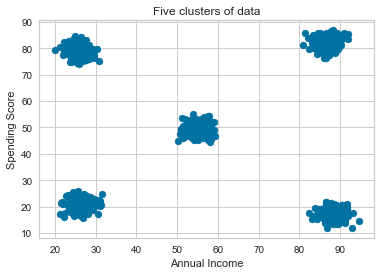

In [35]:
plt.scatter(X[:,0], X[:,1], marker="o", picker=True)
plt.title('Five clusters of data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()